In [163]:
import numpy as np
import scipy as sp 
import pylab as pl
from scipy import signal 
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import sounddevice as sd
import time

# Trabajo práctico III - Felipe Sánchez
## Fundamentos matemáticos del procesamiento de señales

### 1.-Convolución discreta

Una señal finita de N muestras se escribe como  un vector 

$$x =
\begin{bmatrix}
x[0]\\
x[1]\\
\vdots\\
x[N-1]
\end{bmatrix}\in\mathbb{C}^{N}$$

Usando la convolución circular, un operador lineal y homogénemo en el tiempo se puede expresar como:

$$y = x \circledast h = C_{h}^{o}x$$,

Donde $C_{h}^{0}\in\mathcal{M}_{\mathbb{C}}(N,N)$ es una matriz de convolución parametrizada por el vector $h$, la respuesta impulsional del filtro.

Debido a los efectos de borde, la convolución circular $\circledast$ es poco utilizada en algoritmos de la vida real. Se ocupa en su reemplazo la convolución discreta donde las dos señales "rellenadas" (*padding*) con ceros fuera del intervalo de muestreo:

$$\begin{eqnarray}
\tilde{x}[n] = 
\lbrace\begin{array}
\\
x[n] & \text{si } 0\leq n \leq N\\
0 & \text{si no}
\end{array}\\
\tilde{h}[n] = 
\lbrace\begin{array}
\\
h[n] & \text{si } 0\leq n \leq N\\
0 & \text{si no}
\end{array}
\end{eqnarray}$$

donde $\tilde{x},\tilde{h}\in\mathbb{C}^{2N-1}$. Escribimos luego,

$$y = x\star h= C_{h}x$$
para $C_{h}\in\mathcal{M}_{\mathbb{C}}(2N-1,N)$.

**1.-** Dada una respuesta impulsional $h$, escriba las matrices $C_{h}$ y $C_{n}^{0}$. Pruebe que $C_{h}$ es una matriz de Toeplitz y $C_{h}^{o}$ es una matriz circulante.

### Solución:

Consideraremos una matriz de respuesta impulsional

$$h = 
\begin{bmatrix}
h[0]\\
h[1]\\
\vdots \\
h[N-1]
\end{bmatrix}$$

En primero lugar, para encontrar la matriz $C_{h}^{o}$ deberíamos tener por la definición de convolución circular para alguna señal finita $x$ de $N$ muestras la siguiente igualdad 

$$C_{h}^{o} x = 
\begin{bmatrix}
x[0]h[0] + x[1]h[N-1] + \cdots + x[N-1]h[1]\\
x[0]h[1] + x[1]h[0] + \cdots + x[N-1]h[2]\\
\vdots \\
x[0]h[N-1] + x[1]h[N-2] + \cdots + x[N-1]h[0]
\end{bmatrix}
$$

y por consecuencia debemos tener 

$$C_{h}^{o} = 
\begin{bmatrix}
h[0] & h[N-1] & \cdots & h[1]\\
h[1] & h[0] & \cdots & h[2] \\
\vdots & \vdots & \ddots & \cdots \\
h[N-1] & h[N-2] & \cdots & h[0]
\end{bmatrix}_{N\times N}
$$

Luego, fácilmente por el arreglo/definición establecida observamos

$$C_{h} = 
\begin{bmatrix}
h[0] & 0 & 0 & \cdots & 0 \\
h[1] & h[0] & 0 & \dots & 0\\
h[2] & h[1] & h[0] & \cdots & 0\\
\vdots & \vdots\ddots & \vdots\ddots & \vdots\ddots & 0\\
h[N-1] & \cdots & h[2] & h[1] & h[0]\\
0 & h[N-1] & \cdots & h[2] & h[1]\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & h[N-1]
\end{bmatrix}_{2N-1\times N}
$$

Ahora note que $C_{h}^{0}$ posee en sus filas solo permutaciones de los elemntos $\lbrace h[0],h[1],...,h[N-1]\rbrace$, identificándose como una matriz circulante. Por otro lado, observamos que los elementos de las diagonales en la matriz $C_{h}$ son exactamente iguales. Esto nos indica que $C_{h}$ se trata de una matriz de Toeplitz.

### Ejercicio 2 .- Transformadas de Fourier discreta (DFT) y rápida (FFT)

La DFT es un operador lineal que se puede representar como una matriz $F_{N} = [e_{0},e_1,...,e_{N-1}]^{T}\in \mathcal{M}_{\mathbb{C}}(N,N)$ donde $e_{k}\in \mathbb{C}^{N}$ es la $k$-ésima función de la base de Fourier:

$$(F_{N})_{k,p} = e_{k}[p] = e^{i\dfrac{2\pi (p-1)}{N}(k-1)}$$

#### 2.1 Funciones básicas y transformada discreta de Fourier (DFT)

**1.-** Calcule las funciones de base de Fourier $e_{k}$ para todos los índices $k$ para una señal de tamaño $N=32$. Trazar sus partes reales e imaginarias en una figura.

Note que la matriz de Fourier de forma explícita tiene la siguiente forma

$$F_{N} =\left(
\begin{matrix}
1 & 1 & 1 & \cdots & 1\\
1 & e^{i\frac{2\pi}{N}} & e^{i\frac{4\pi}{N}} & \cdots & e^{i\frac{2\pi (N-1)}{N}}\\
1 & e^{i\frac{4\pi}{N}} & \ddots & \cdots & e^{i\frac{4\pi (N-1)}{N}}\\
\vdots & \vdots & \vdots & \cdots & \vdots\\
1 & e^{i\frac{2\pi (N-1)}{N}} & e^{i\frac{4\pi (N-1)}{N}} & \cdots & e^{i\frac{2\pi (N-1)(N-1)}{N}}
\end{matrix}
\right)
$$

Entonces ahora, para N=32 calcularemos las funciones de la base de Fourier.

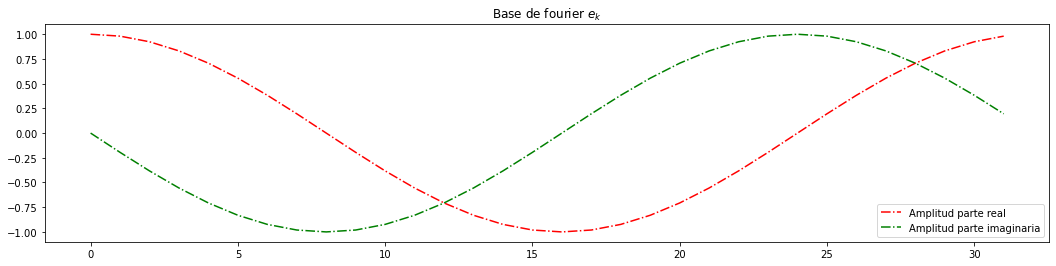

In [164]:
N = 32 # Tamaño muestras
t = np.arange(0,N,1) # vector temporal discreto

# calculamos las funciones de base de fourier
for k in range(0,N):
    f_k = k/N
    w_k = 2*np.pi*f_k
    e_k = np.exp(1j*w_k*t) 
    
# Graficamos

plt.figure(figsize = (18,4))
plt.title('Base de fourier $e_k$')
plt.plot(t,np.real(e_k),'r-.',label = 'Amplitud parte real')
plt.plot(t,np.imag(e_k),'g-.',label = 'Amplitud parte imaginaria')
plt.legend();

**2.-** Calcule $F_N$ la matriz de transformada discreta de Fourier (DFT) para N = 1,2,4 Y 32. Para N=32 visualícela las partes realees e imaginarias como una imágen. ¿Qué contienen las líneas de la matriz F_N?

In [165]:
# Creamos una función que nos permita crear la matriz de Fourier de tamaño N
def FN(N):
    F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja
    #Creamos matriz
    for i in range(N):
        for j in range(N):
            F_N[i,j] = np.exp(1j*2*np.pi/N)**(i*j)
    return F_N

# ahora calculamos la transformada de fourier discreta para los tamaños pedidos.

for N in [1,2,4,32]:
    print("La matriz de la transformada de Fourier discreta para N = ",N)
    if N == 32:
        FN_32 = FN(N)
        print(FN(N))
    else:
        print(FN(N));
    print("")

La matriz de la transformada de Fourier discreta para N =  1
[[1.+0.j]]

La matriz de la transformada de Fourier discreta para N =  2
[[ 1.+0.0000000e+00j  1.+0.0000000e+00j]
 [ 1.+0.0000000e+00j -1.+1.2246468e-16j]]

La matriz de la transformada de Fourier discreta para N =  4
[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17+1.0000000e+00j
  -1.0000000e+00+1.2246468e-16j -1.8369702e-16-1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00+1.2246468e-16j
   1.0000000e+00-2.4492936e-16j -1.0000000e+00+3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16-1.0000000e+00j
  -1.0000000e+00+3.6739404e-16j  5.5109106e-16+1.0000000e+00j]]

La matriz de la transformada de Fourier discreta para N =  32
[[ 1.        +0.j          1.        +0.j          1.        +0.j
  ...  1.        +0.j          1.        +0.j
   1.        +0.j        ]
 [ 1.        +0.j 

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


Una vez obtenidas las matrices asociadas al DFT, visualizamos como imágen la matriz para N=32 para la parte real e imaginaria

#### Parte real

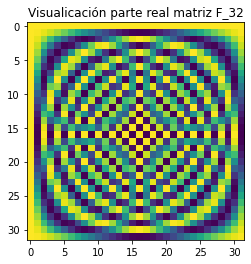

In [166]:
plt.figure()
plt.title("Visualicación parte real matriz F_32")
pl.imshow(np.real(FN_32));
# barra de colores

#### Parte imaginaria

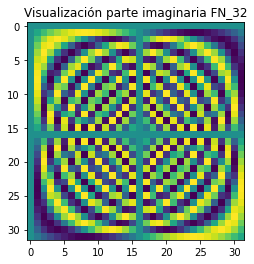

In [167]:
plt.figure()
plt.title("Visualización parte imaginaria FN_32")
plt.imshow(np.imag(FN_32));

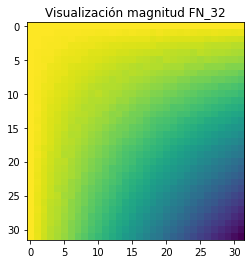

In [168]:
plt.figure()
plt.title("Visualización magnitud FN_32")
plt.imshow(np.abs(FN_32));

**3.-** Para una señal de largo $N=1024$ tal que

$$x[n] = \cos (2\pi f_{0}n)$$

con $f_{0} = \frac{k}{N}$ para $k<\frac{N}{2}$ un entero positivo, calcule la matriz $F_{N}$ y aplíquela a la señal $x$. Visualice luego la magnitud del resultado en el dominio frecuencial.



In [169]:
def get_xHat(N,k):
    w0=2*np.pi*f0
    t=np.arange(0,N,1)
    x=np.sin(w0*t)
    Fn=FN(N)
    xHat=(1/N)*Fn.dot(x)
    w=np.arange(-1/2,1/2,1/N)
    
    return(t,x,w,xHat,w0)

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


Text(0.5, 0, 'frencua[Hz]')

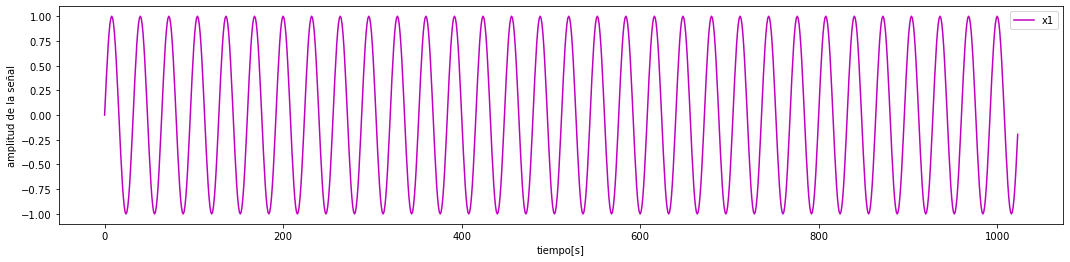

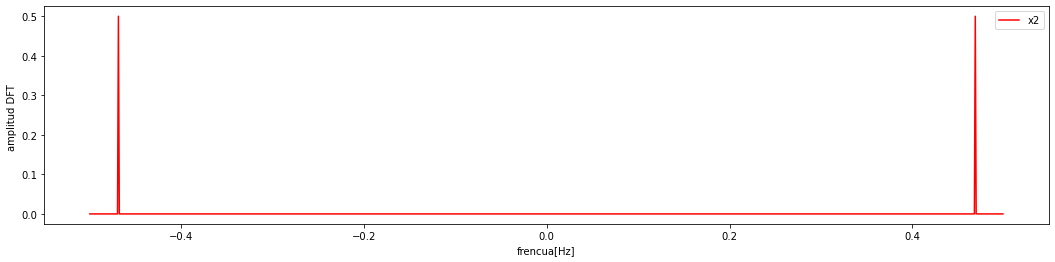

In [170]:
N=1024
k=32
f0=k/N

t,x,w,xHat,w0=get_xHat(N,f0)

pl.figure(figsize=(18,4))
pl.plot(t,x,'m-',label="x1")
pl.legend()
pl.ylabel("amplitud de la señal")
pl.xlabel("tiempo[s]")

pl.figure(figsize=(18,4))
pl.plot(w,np.abs(xHat),'r-',label='x2')
pl.legend()
pl.ylabel('amplitud DFT ')
pl.xlabel('frencua[Hz]')

**4.-** Cambie $f_0$ a un valor grande tal que $k>N$. ¿Qué sucede con el espectro?.

Vamos a considerar una visualización para distintos valores de $k$ tal que $k>N$.

Graficamos:

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


Text(0.5, 0, 'frencua[Hz]')

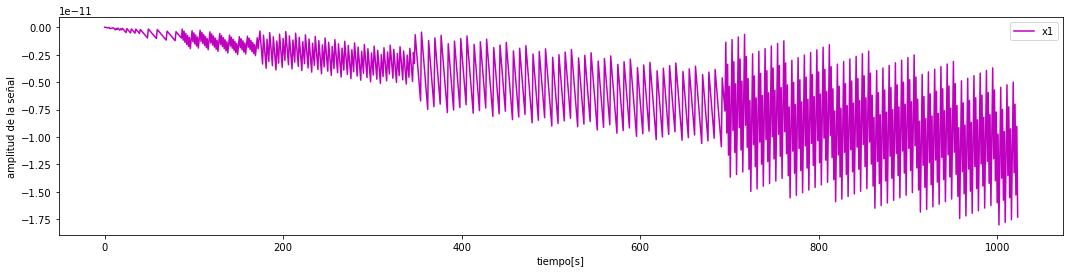

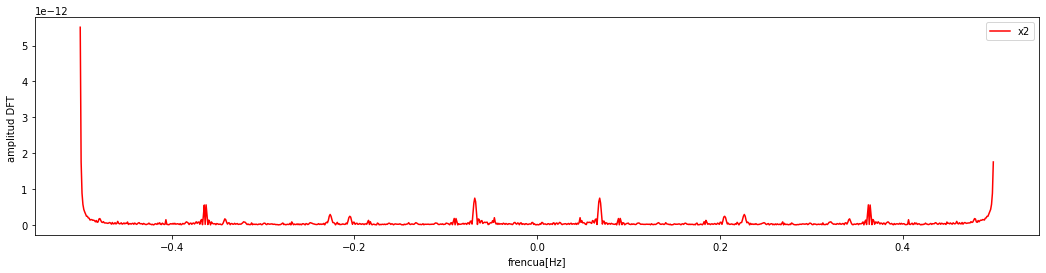

In [171]:
k=1024*15
f0=k/N

t,x,w,xHat,w0=get_xHat(N,f0)

pl.figure(figsize=(18,4))
pl.plot(t,x,'m-',label="x1")
pl.legend()
pl.ylabel("amplitud de la señal")
pl.xlabel("tiempo[s]")

pl.figure(figsize=(18,4))
pl.plot(w,np.abs(xHat),'r-',label='x2')
pl.legend()
pl.ylabel('amplitud DFT ')
pl.xlabel('frencua[Hz]')

Note que en el espectro de la señal se observa "peaks" en los lugares donde la señal se encuentra "más condensada" en el tiempo.

### 2.2 Transformada rápida de Fourier (FFT)

**1.-** Mida el tiempo de cálculo de la DFT con y sin el cálculo previo de la matriz de Fourier $F_N$ para $N =1024$

Aplicaremos la transformada discreta de fourier para la señal definida en el problema anterior con $N = 1025$ y $k = 511$.

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


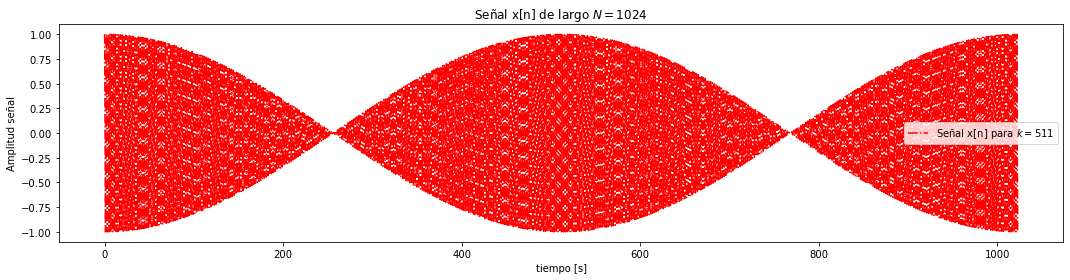

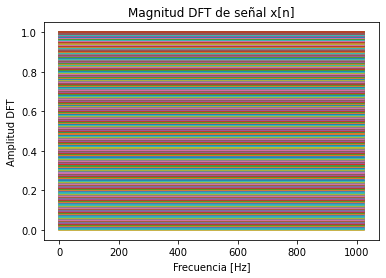

In [172]:
x_1024,xhat_1024 = grafx_DFTx(1024,511)

In [173]:
# Medimos el timpo de ejecución de calclar la matriz DFT y aplicarla
inicio_1 = time.time()

FN_1024 = FN(1024) # Calcula matriz
FN_1024*np.transpose(x_1024)
fin_1 = time.time()
print(f'El tiempo de ejecución de calcular la matriz de Fourier y aplciarla es de {fin_1-inicio_1} segundos')

# Medimos el tiempo de ejecución de calcular la matriz DFT con la matriz precalculada

inicio_2 = time.time()

FN_1024*np.transpose(x_1024) # calcula transformada de Fourier discreta

fin_2 = time.time()
print(f'El tiempo de ejecución de calcular la DFT con la matriz FN precalculada es de {fin_2-inicio_2} segundos')

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


El tiempo de ejecución de calcular la matriz de Fourier y aplciarla es de 2.3313686847686768 segundos
El tiempo de ejecución de calcular la DFT con la matriz FN precalculada es de 0.00797891616821289 segundos


**2.-** Usando el método np.fft.fft mida el tiempo del cálculo de la FFT de la misma señal y compárelo con los dos tiempos anteriores.

In [174]:
# Calculamos y medimos el tiempo de cálculo de la FFT

inicio = time.time()

np.fft.fft(x_1024)

fin = time.time()
print(f"el tiempo de ejecución de la FFT de la misma señal anterior es de {fin-inicio} segundos")

el tiempo de ejecución de la FFT de la misma señal anterior es de 0.0 segundos


**3.-** Calcule y almacene el tiempo computacional de la DFT, DFT con la matriz precalculada y la FFT para $N= 2k$ muestreados logarítmicamente de $k=2$ a $k=12$. Trace un gráfico log vs log con los diferentes tiempos compuacionales en función de N. Discuta lo observado.

<ipython-input-165-0d41d16d6acc>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F_N = np.zeros(shape=(N,N),dtype=np.complex) # Creamos inicialmente matriz de ceros compleja


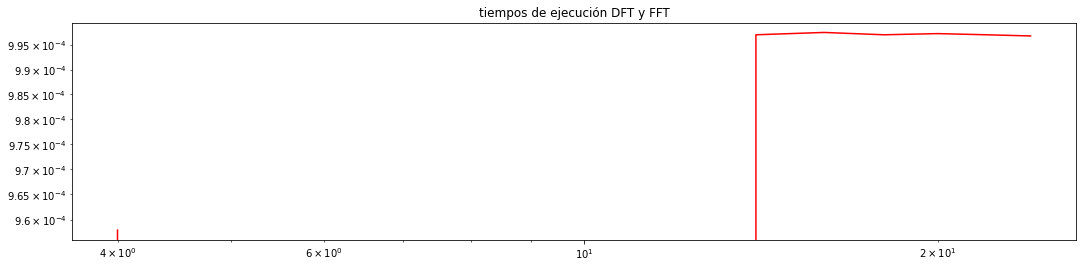

In [175]:
# En primer lugar, generamos una función que nos arroje la señal de tamaño N = 2k

def getx_2k(k):
    N = 2*k
    n = np.arange(0,N)
    f_0 = int(k)/N
    # Creamos la señal
    x_n = np.cos(2*np.pi*f_0*n)
    return x_n

# Calculamos señales requeridas más adelante
señales = []
for k in range(2,13):
    señales.append(getx_2k(k))

# Creamos lsitas vacías de tiempo para posteriormente graficar junto con una lista de las matrices FN
tiempo_dft = []
tiempo_dft_prec = []
tiempo_fft = []
FN_2k = []

# calculamos los tiempos del ejecución de la DFT sin la matriz precalculada

for k in range(2,13):
    # Estimamos y guardamos tiempos de cálculo FN y DFT
    inicio_dft = time.time()
    FN(2*k)*np.transpose(señales[k-2])
    fin_dft = time.time()
    tiempo_dft.append(fin_dft - inicio_dft)
    FN_2k.append(FN(2*k)) # Almacenamos matrices fuera de la medición del tiempo para no afectarlo
    
# Calculamos tiempos de DFT con matriz precalculada y FFT

for i in range(0,11):
    # Estimamos tiempo DFT con matriz precalculada
    inicio_dft_prec = time.time()
    FN_2k[i]*np.transpose(señales[i])
    fin_dft_prec = time.time()
    tiempo_dft_prec.append(fin_dft_prec - inicio_dft_prec)
    
    # Estimamos tiempo FFT para las señales
    inicio_fft = time.time()
    np.fft.fft(señales[i])
    fin_fft = time.time()
    tiempo_fft.append(fin_fft - inicio_fft)
    
# Graficamos en escala Log-Log el tiempo de ejecución de cada situación presentada
N = 2*np.arange(2,13)

plt.figure(figsize=(18,4))
plt.title('tiempos de ejecución DFT y FFT')
plt.loglog(N,tiempo_dft,'r')
#plt.loglog(N,tiempo_dft_prec,'b')
#plt.loglog(N,tiempo_fft,'g')

# PROBAR TAMBIÉN PLT.PLOT

### 3.- Interpretación de las señales

Para todas las señales que se describen a continuación, siga los siguientes pasos:

1. Cargue la señal en la memoria y almacene tanto la señal $x$ como la frecuencia de muestreo $f_s$
2. Trace la señal en el tiempo con el eje $x$ adecuado
3. Grafique la magnitud de la señal FFT con la frecuencia real correspondiente centrada en 0.
4. Interprete y discuta las propiedades de la señal en frecuencia utilizando la información proporcionada sobre cada señal en las descripciones a continuación. Cuando sea posible, recupere parámetros físicos como la constante de tiempo de las frecuencias fundamentales de las señales. Puede hacer zoom en parte de un gráfico utilizando pl.xlim([xmin,xmax]).

* A4.wav contiene la nota MIDI m= 69

Frecuencia de muestro f_s = 44100 Hz


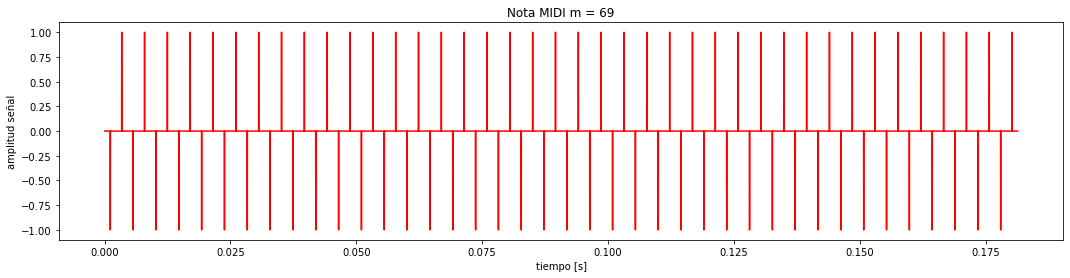

In [176]:
# Guardamos señal y frecuencia de muestreo
f_A4,x_A4 = wavfile.read('A4.wav')
print(f'Frecuencia de muestro f_s = {f_A4} Hz')

# Trazamos la señal en el tiempo
K = 600
t = np.arange(0,len(x_A4)/f_A4,1/f_A4)
plt.figure(figsize = (18,4))
plt.title('Nota MIDI m = 69')
plt.plot(t,x_A4,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_A4,f_A4)
sd.wait()

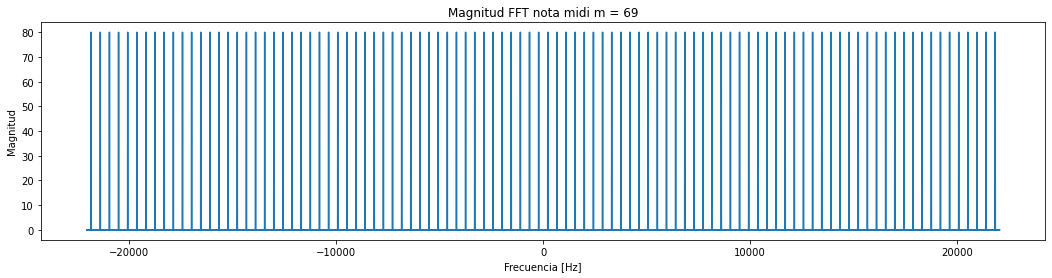

In [177]:
# Calculamos transformada de Fourier rápida
A4_hat = np.fft.fft(x_A4)
A4_freq = np.fft.fftfreq(len(x_A4),1/f_A4)

plt.figure(figsize=(18,4))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT nota midi m = 69')
plt.plot(A4_freq,np.abs(A4_hat));

(1090.0, 1110.0)

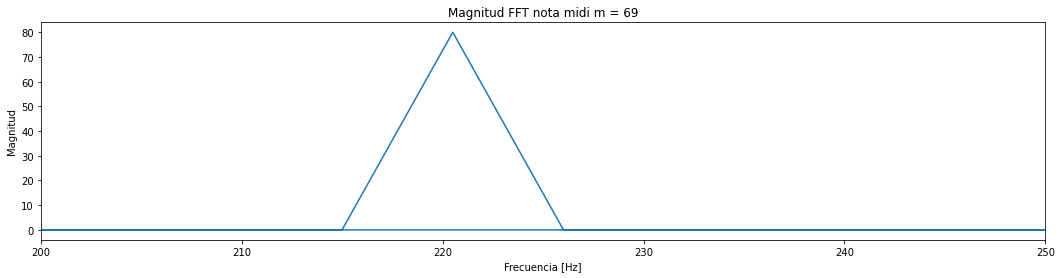

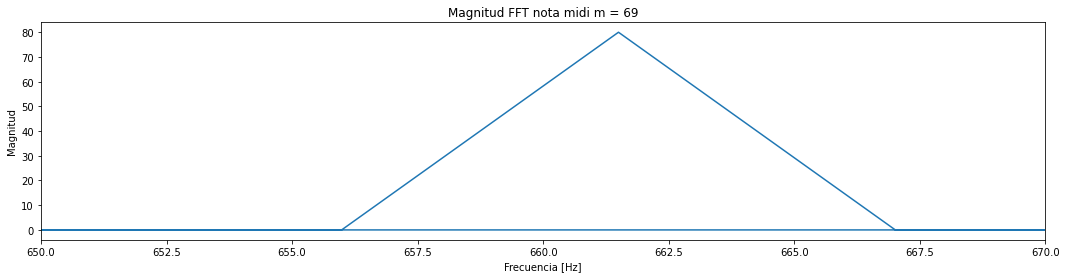

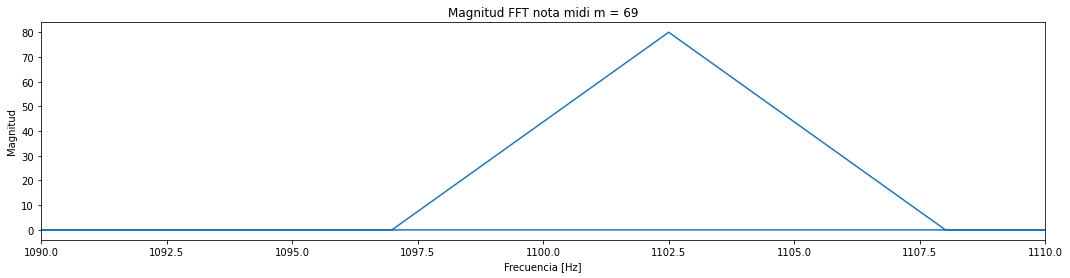

In [178]:
#hacemos zoom
plt.figure(figsize=(18,4))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT nota midi m = 69')
plt.plot(A4_freq,np.abs(A4_hat))
plt.xlim([200,250])

plt.figure(figsize=(18,4))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT nota midi m = 69')
plt.plot(A4_freq,np.abs(A4_hat))
plt.xlim([650,670])

plt.figure(figsize=(18,4))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT nota midi m = 69')
plt.plot(A4_freq,np.abs(A4_hat))
plt.xlim([1090,1110])

Note que en la frecuencia 220Hz aproximadamente se observa incremento en magnitud, esto tiene sentido porque se trata de una nota A.

* A4clip.wav contiene la nota MIDI m = 69 con el recorte correspondiente a un efecto de saturación

Frecuencia de muestro f_s = 44100 Hz


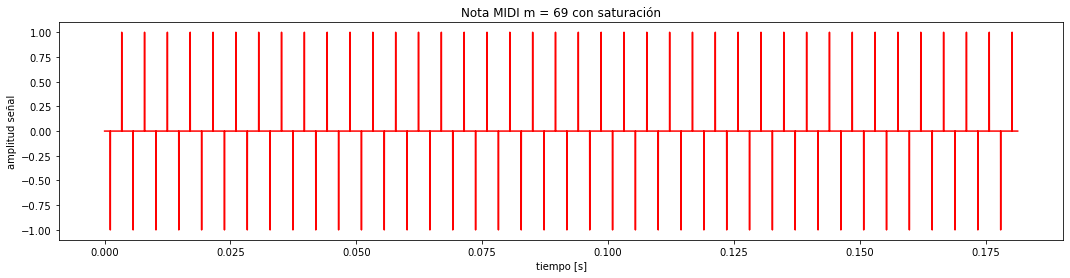

In [179]:
# Guardamos señal y frecuencia de muestreo
f_A4clip,x_A4clip = wavfile.read('A4.wav')
print(f'Frecuencia de muestro f_s = {f_A4clip} Hz')

# Trazamos la señal en el tiempo
#K = 600
t = np.arange(0,len(x_A4clip)/f_A4clip,1/f_A4clip)
plt.figure(figsize = (18,4))
plt.title('Nota MIDI m = 69 con saturación')
plt.plot(t,x_A4clip,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_A4clip,f_A4clip)
sd.wait()

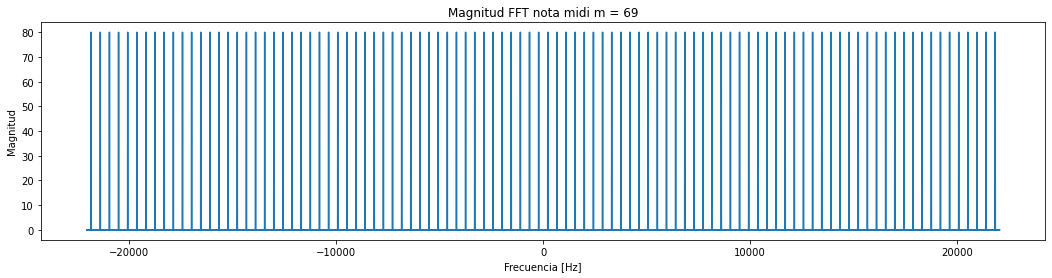

In [180]:
# Calculamos transformada de Fourier rápida
A4clip_hat = np.fft.fft(x_A4clip)
A4clip_freq = np.fft.fftfreq(len(x_A4clip),1/f_A4clip)

plt.figure(figsize=(18,4))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT nota midi m = 69')
plt.plot(A4clip_freq,np.abs(A4clip_hat));

Idem análisis anterior

* seq.wav contiene la secuencia de notas generada en el TP2

Frecuencia de muestro f_s = 8000 Hz


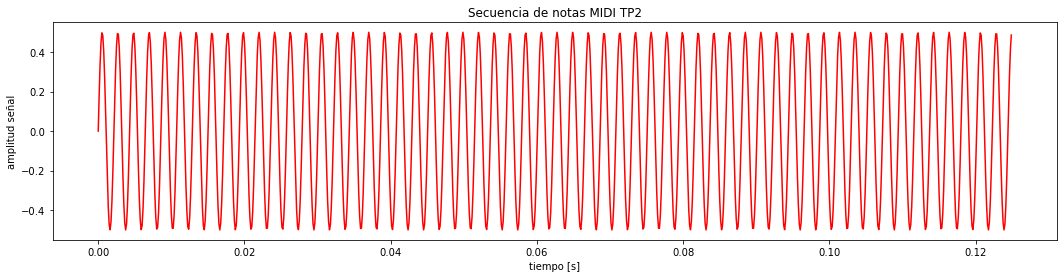

In [181]:
# Guardamos señal y frecuencia de muestreo
f_seq,x_seq = wavfile.read('seq.wav')
print(f'Frecuencia de muestro f_s = {f_seq} Hz')

# Trazamos la señal en el tiempo
K = 1000
t = np.arange(0,len(x_seq)/f_seq,1/f_seq)
plt.figure(figsize = (18,4))
plt.title('Secuencia de notas MIDI TP2')
plt.plot(t[:K],x_seq[:K],'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_seq,f_seq)
sd.wait()

Text(0, 0.5, 'Magnitud')

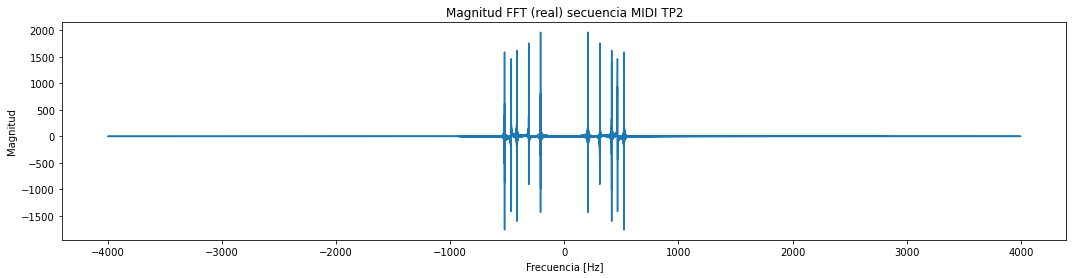

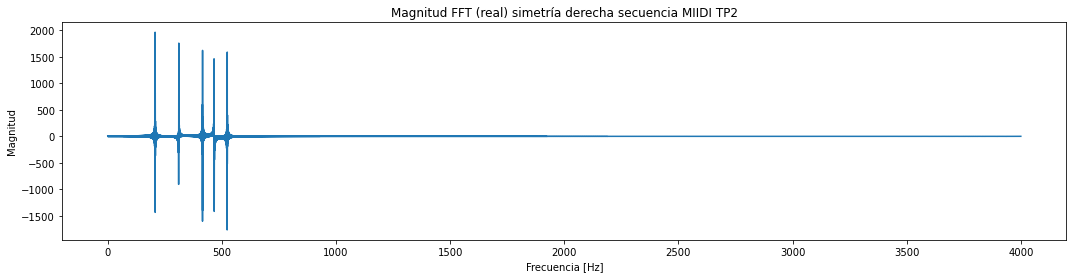

In [182]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_seq = np.fft.fft(x_seq)
freq_seq = np.fft.fftfreq(x_seq.size,1/f_seq)

plt.figure(figsize = (18,4))
plt.plot(freq_seq,hat_x_seq.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) secuencia MIDI TP2');
# Realizamos gráfico con parte simétrica del lado positivo
plt.figure(figsize = (18,4))
plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

Hacemos un zoom para hallar las frecuencias predominantes

(0.0, 550.0)

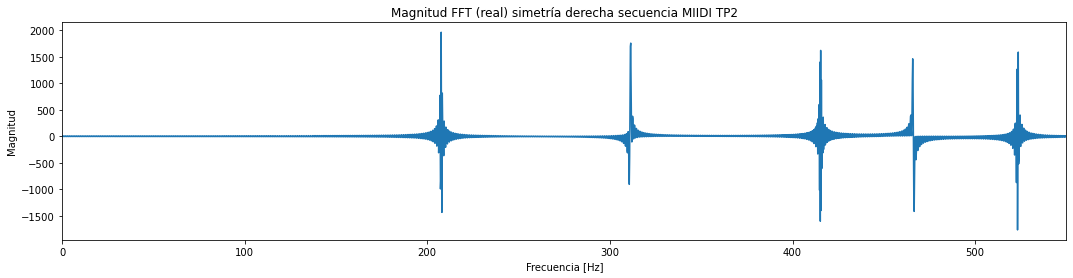

In [183]:
plt.figure(figsize = (18,4))
plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0,550])

Las frecuencias predominantes coinciden con las notas midi ingresadas en el trabajo práctico 2.

* chirp.wav contiene una señal de modulación de frecuencia de chrip. ¿Cuáles son las frecuencias instantáneas de esta señal?¿Cuál es el soporte de su espectro?

Frecuencia de muestro f_s = 8000 Hz


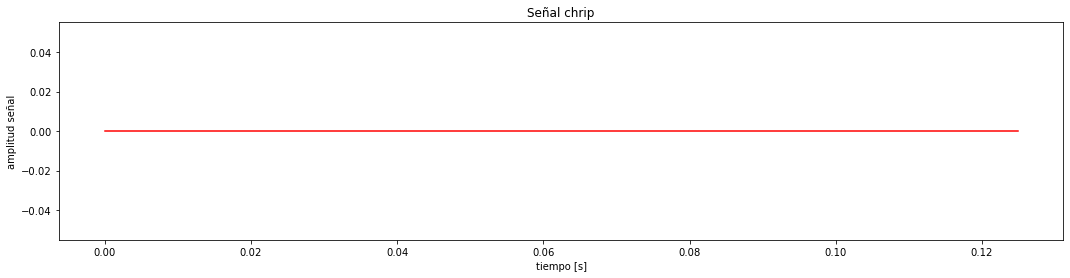

In [184]:
# Guardamos señal y frecuencia de muestreo
f_chrip,x_chrip = wavfile.read('chrip.wav')
print(f'Frecuencia de muestro f_s = {f_chrip} Hz')

# Trazamos la señal en el tiempo
K = 1000
t = np.arange(0,len(x_chrip)/f_chrip,1/f_chrip)
plt.figure(figsize = (18,4))
plt.title('Señal chrip')
plt.plot(t[:K],x_chrip[:K],'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_chrip,f_chrip)
sd.wait()

* uku.wav y uku2.wav contienen una nota "mal" interpretada en ukelele. ¿Cuales son las notas tocadas?¿Cuáles son sus números MIDI correspondientes?

#### -> uku.wav

Frecuencia de muestro f_s = 8000 Hz


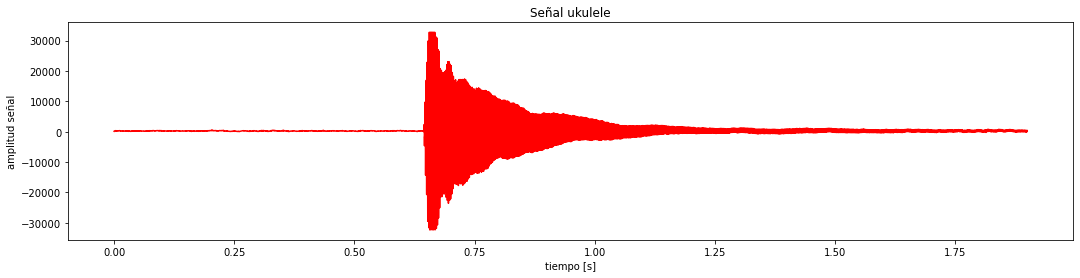

In [185]:
# Guardamos señal y frecuencia de muestreo
f_uku,x_uku = wavfile.read('uku.wav')
print(f'Frecuencia de muestro f_s = {f_uku} Hz')

# Trazamos la señal en el tiempo

t = np.arange(0,len(x_uku)/f_uku,1/f_uku)
plt.figure(figsize = (18,4))
plt.title('Señal ukulele')
plt.plot(t,x_uku,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_uku,f_uku)
sd.wait()

Una vez escuchada la señal, que a "oreja" se trata de una nota A, analizamos su espectro

Text(0, 0.5, 'Magnitud')

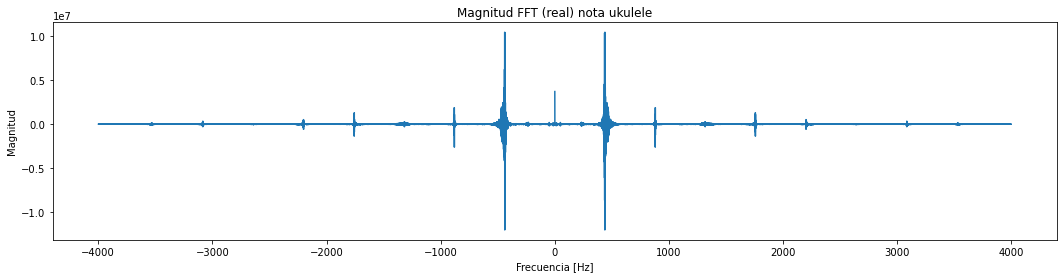

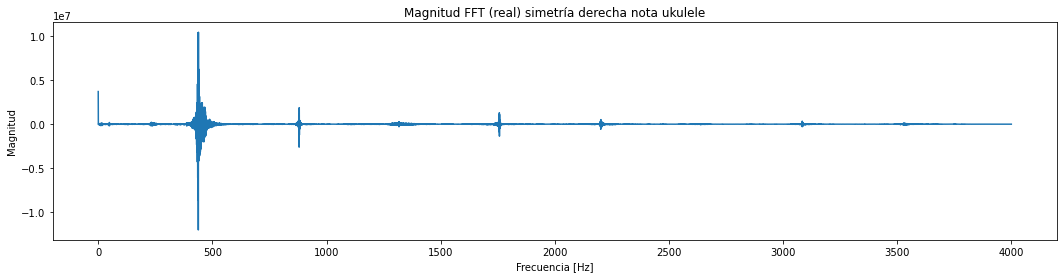

In [186]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_uku = np.fft.fft(x_uku)
freq_uku = np.fft.fftfreq(x_uku.size,1/f_uku)

plt.figure(figsize = (18,4))
plt.plot(freq_uku,hat_x_uku.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) nota ukulele');
# Realizamos gráfico con parte simétrica del lado positivo
plt.figure(figsize = (18,4))
plt.plot(freq_uku[:int(x_uku.size/2)],hat_x_uku.real[:int(x_uku.size/2)])
plt.title('Magnitud FFT (real) simetría derecha nota ukulele')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

Hacemos zoom para hallar la frecuencia fundamental

(430.0, 500.0)

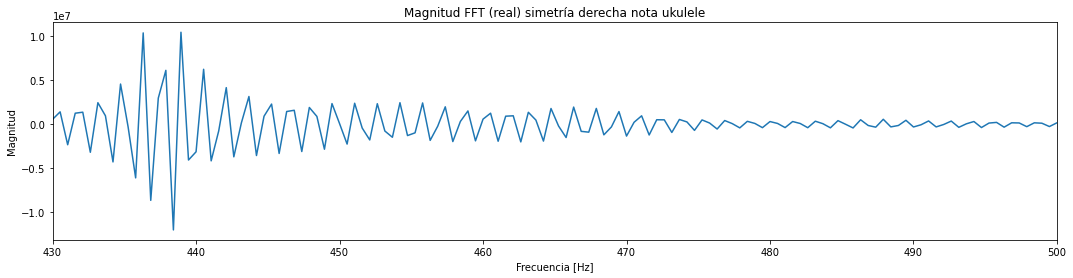

In [187]:
plt.figure(figsize = (18,4))
plt.plot(freq_uku[:int(x_uku.size/2)],hat_x_uku.real[:int(x_uku.size/2)])
plt.title('Magnitud FFT (real) simetría derecha nota ukulele')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([430,500])

Se observa que la nota ejecutada por el ukulele fue de un A4 ligeramente "desafinado".

#### -> uku2.wav

Frecuencia de muestro f_s = 8000 Hz


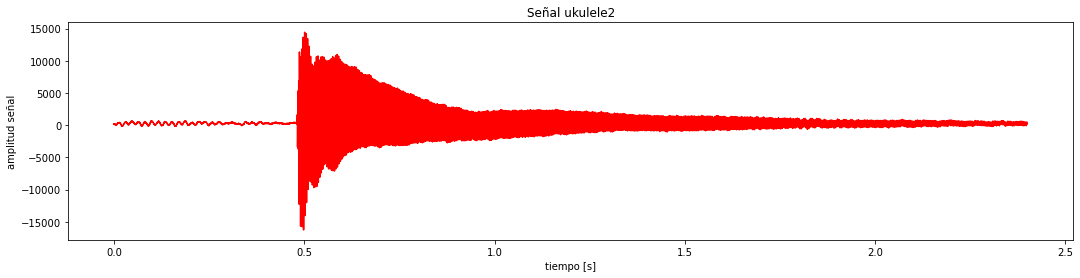

In [188]:
# Guardamos señal y frecuencia de muestreo
f_uku2,x_uku2 = wavfile.read('uku2.wav')
print(f'Frecuencia de muestro f_s = {f_uku2} Hz')

# Trazamos la señal en el tiempo

t = np.arange(0,len(x_uku2)/f_uku2,1/f_uku2)
plt.figure(figsize = (18,4))
plt.title('Señal ukulele2')
plt.plot(t,x_uku2,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_uku2,f_uku2)
sd.wait()

Luego de escuchar la señal, nuevamente a "oreja", se trata de una nota C. Analizamos lo que sucede con el espectro de la señal

Text(0, 0.5, 'Magnitud')

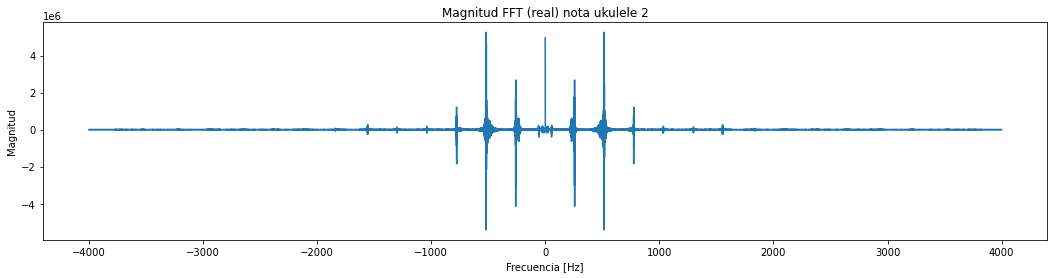

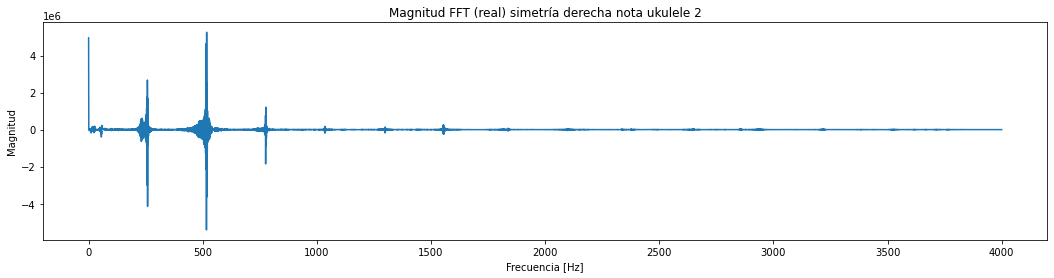

In [189]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_uku2 = np.fft.fft(x_uku2)
freq_uku2 = np.fft.fftfreq(x_uku2.size,1/f_uku2)

plt.figure(figsize = (18,4))
plt.plot(freq_uku2,hat_x_uku2.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) nota ukulele 2');
# Realizamos gráfico con parte simétrica del lado positivo
plt.figure(figsize = (18,4))
plt.plot(freq_uku2[:int(x_uku2.size/2)],hat_x_uku2.real[:int(x_uku2.size/2)])
plt.title('Magnitud FFT (real) simetría derecha nota ukulele 2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

Hacemos zoom para hallar frecuencia predominante

(450.0, 550.0)

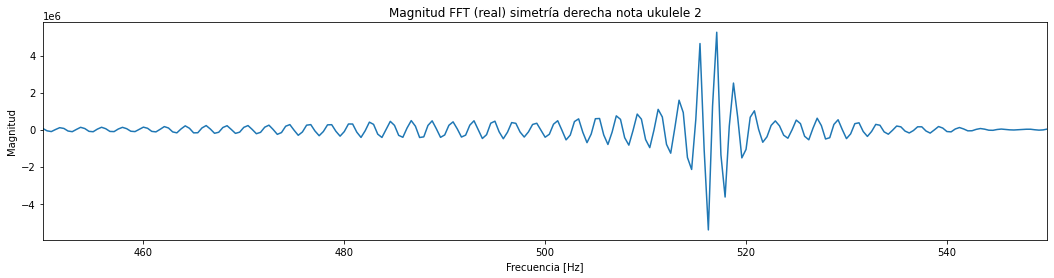

In [190]:
plt.figure(figsize = (18,4))
plt.plot(freq_uku2[:int(x_uku2.size/2)],hat_x_uku2.real[:int(x_uku2.size/2)])
plt.title('Magnitud FFT (real) simetría derecha nota ukulele 2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([450,550])

Considerando el espectro, se observa que la nota ejecutada fue de un C5 ligeramente "desafinado".

* drum.wav es una grabación de una ejecución de una batería que contiene un bombo y un platillo, correspondientes respectivamente a una señal de baja y alta frecuencia.

Frecuencia de muestro f_s = 16000 Hz


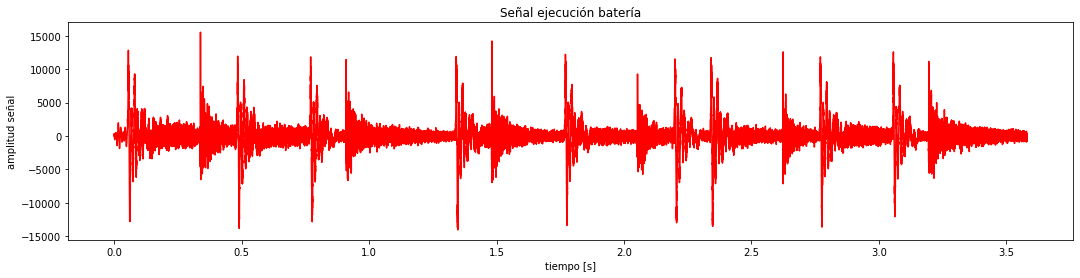

In [191]:
# Guardamos señal y frecuencia de muestreo
f_drum,x_drum = wavfile.read('drum.wav')
print(f'Frecuencia de muestro f_s = {f_drum} Hz')

# Trazamos la señal en el tiempo

t = np.arange(0,len(x_drum)/f_drum,1/f_drum)
plt.figure(figsize = (18,4))
plt.title('Señal ejecución batería')
plt.plot(t,x_drum,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_drum,f_drum)
sd.wait()

Text(0, 0.5, 'Magnitud')

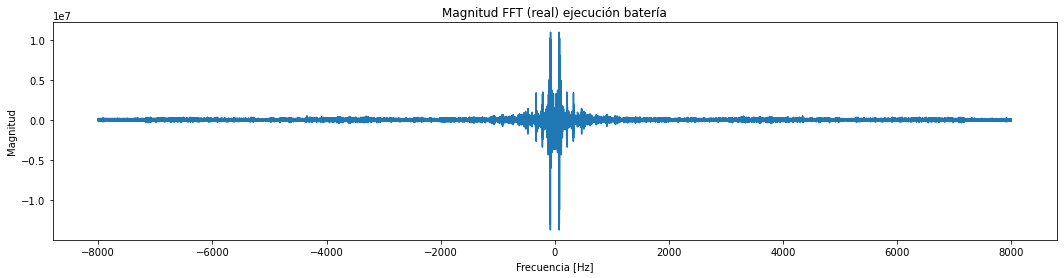

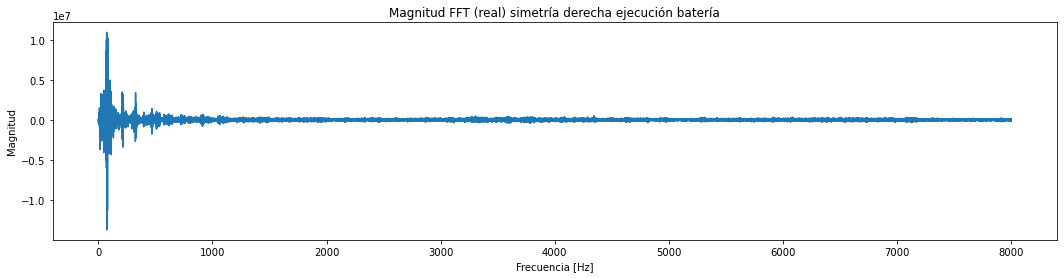

In [192]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_drum = np.fft.fft(x_drum)
freq_drum = np.fft.fftfreq(x_drum.size,1/f_drum)

plt.figure(figsize = (18,4))
plt.plot(freq_drum,hat_x_drum.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) ejecución batería');
# Realizamos gráfico con parte simétrica del lado positivo con zoom
plt.figure(figsize = (18,4))
plt.plot(freq_drum[:int(x_drum.size/2)],hat_x_drum.real[:int(x_drum.size/2)])
plt.title('Magnitud FFT (real) simetría derecha ejecución batería')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

Hcemos zoom

(0.0, 1000.0)

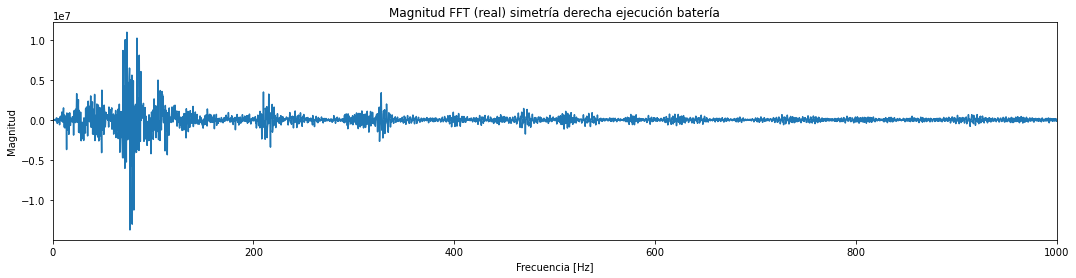

In [193]:
plt.figure(figsize = (18,4))
plt.plot(freq_drum[:int(x_drum.size/2)],hat_x_drum.real[:int(x_drum.size/2)])
plt.title('Magnitud FFT (real) simetría derecha ejecución batería')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0,1000])

Podríamos notar afinación en las componentes de las melodías, pero lo más importante a notar en este espectro es que las frecuencias predominantes son bajas. Esto se debe a los golpes fuertes del bombo que realiza el baterista.

* stairway.wav y stairwayb.wav contiene 10 segundos del comienzo de una canción conocida. El segundo archivo ha sido dañado por ruido. Haga un zoom en las frecuencias bajas y encuentre el modo.¿Cuál es la nota MIDI correspondiente a este modo que es la nota más tocada en la secuencia?¿Cuál es el soporte en frecuencia del ruido agregado? 

#### -> stairway.wav

Frecuencia de muestro f_s = 44100 Hz


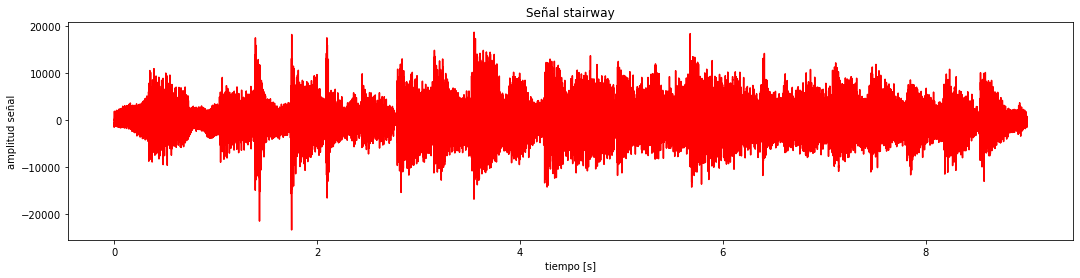

In [194]:
# Guardamos señal y frecuencia de muestreo
f_stairway,x_stairway = wavfile.read('stairway.wav')
print(f'Frecuencia de muestro f_s = {f_stairway} Hz')

# Trazamos la señal en el tiempo

t = np.arange(0,len(x_stairway)/f_stairway,1/f_stairway)
plt.figure(figsize = (18,4))
plt.title('Señal stairway')
plt.plot(t,x_stairway,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_stairway,f_stairway)
sd.wait()

(0.0, 200.0)

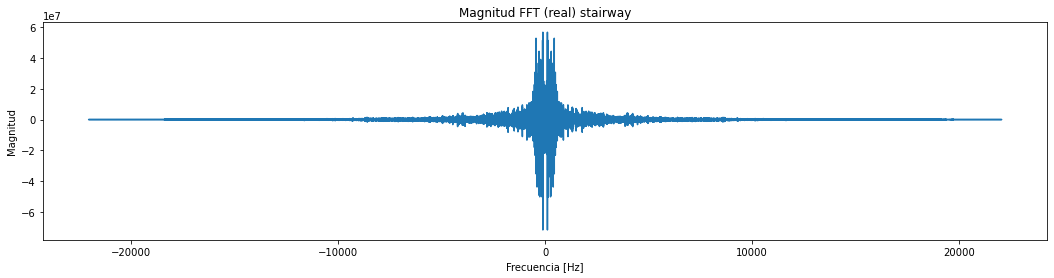

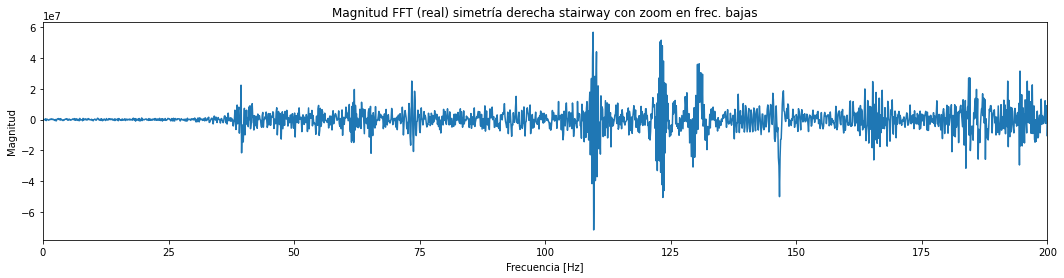

In [195]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_stairway = np.fft.fft(x_stairway)
freq_stairway = np.fft.fftfreq(x_stairway.size,1/f_stairway)

plt.figure(figsize = (18,4))
plt.plot(freq_stairway,hat_x_stairway.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) stairway');
# Realizamos gráfico con parte simétrica del lado positivo
plt.figure(figsize = (18,4))
plt.plot(freq_stairway[:int(x_stairway.size/2)],hat_x_stairway.real[:int(x_stairway.size/2)])
plt.title('Magnitud FFT (real) simetría derecha stairway con zoom en frec. bajas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0,200]) # zoom em simetría derecha

Notamos que la frecuencia fundamental de este análisis del espectro se encuentra en los 110Hz aproximádamente. Esto se corresponde con la nota A2. 
Luego, sabiendo que la tonalidad de la canción "Stairway" es de Am, determinamos que el análisis es correcto. Pues debería ser la nota más ejecutada en la secuencia.

* Nota midi m = 45.

#### -> stairwayb.wav

Frecuencia de muestro f_s = 16000 Hz


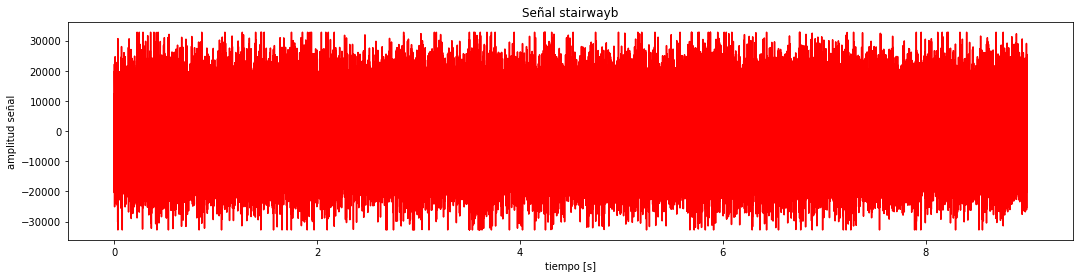

In [196]:
# Guardamos señal y frecuencia de muestreo
f_stairwayb,x_stairwayb = wavfile.read('stairwayb.wav')
print(f'Frecuencia de muestro f_s = {f_stairwayb} Hz')

# Trazamos la señal en el tiempo

t = np.arange(0,len(x_stairwayb)/f_stairwayb,1/f_stairwayb)
plt.figure(figsize = (18,4))
plt.title('Señal stairwayb')
plt.plot(t,x_stairwayb,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

# Escuchamos la señal
sd.play(x_stairwayb,f_stairwayb)
sd.wait()

Text(0, 0.5, 'Magnitud')

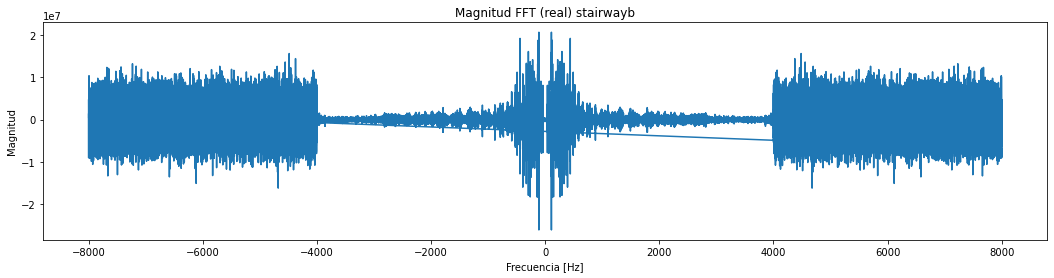

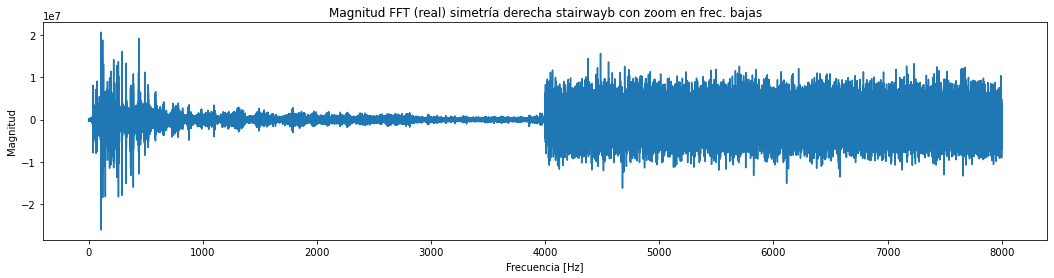

In [197]:
# Calculamos su transformada de Fourier rápida y graficamos 
hat_x_stairwayb = np.fft.fft(x_stairwayb)
freq_stairwayb = np.fft.fftfreq(x_stairwayb.size,1/f_stairwayb)

plt.figure(figsize = (18,4))
plt.plot(freq_stairwayb,hat_x_stairwayb.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) stairwayb');
# Realizamos gráfico con parte simétrica del lado positivo
plt.figure(figsize = (18,4))
plt.plot(freq_stairwayb[:int(x_stairwayb.size/2)],hat_x_stairwayb.real[:int(x_stairwayb.size/2)])
plt.title('Magnitud FFT (real) simetría derecha stairwayb con zoom en frec. bajas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

Luego de este análisis, por a frecuencia propia del ruido notamos que ocurre un repliegue de las frecuencias de la canción con el ruido. Con esto podemos identificar a ambos y realizar filtros posteriormennte para eliminar el ruido.

El soporte en frecuencia se extiende desde 0 a 8000Hz.

Note que la gráfica identificamos un comportamiento de ruido blanco.

* ecg.npz y conso.npz INVESTIGAR COMO LEER ARCHIVOS NPZ!

### 4.1- Filtraje digital 

En esta sección estudiaremos varios filtros digitales y los aplicaremos a las señales.


**1.-** Cargue la señal en el archivo "stairwayb.wav". Intentaremos atenuar el ruido presente en el audio cortando toda la banda de la frecuencia donde hay ruido.

In [198]:
f_stairwayb,x_stairwayb = wavfile.read('stairwayb.wav') # (re)Cargamos la señal
# Graficamos la señal
t = np.arange(0,len(x_stairwayb)/f_stairwayb,1/f_stairwayb)
plt.figure(fig>size = (18,4))
plt.title('Señal stairwayb')
plt.plot(t,x_stairwayb,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud señal');

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-198-57d0726b0acc>, line 4)

**2.-** Calcule la FFT de la señal y grafique su magnitud en el dominio de Fourier. Seleccione una frecuencia de corte $f_c$ para un filtro de paso bajo ideal.

In [ ]:
xhat_stairwayb = np.fft.fft(x_stairwayb) # Calculamos la transformada de Fourier
# Graficamos la señal en el dominio de Fourier
freq_stairwayb = np.fft.fftfreq(x_stairwayb.size)

plt.figure(figsize = (18,4))
plt.plot(freq_stairwayb,hat_x_stairwayb.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) stairwayb');

Ahora, con fines de hallar una frecuencia de corte, realizaremos un zoom a la señal entre las frecuencias 0,21 y 0,28

In [ ]:
plt.figure(figsize = (18,4))
plt.plot(freq_stairwayb,hat_x_stairwayb.real)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) stairwayb')
pl.xlim([0.21,0.28])
plt.grid()

Bajo esto, establecemos que la frecuencia de corte para este filtro que nos interesa ("Band-pass") será de $f_c = 0.25$ [Hz]

**3.-** Aplique el filtro ideal "Band-pass" con una frecuencia de corte $f_c$. Escuche la señal filtrada. Tenga en consideración que guardar un archivo .wav en formato flotante recorta loa valores entre -1 y 1, por lo que la señal se debe escalar correctamente para evitar saturación.

In [ ]:
f_c = 0.25 # Establecemos frecuencia de corte
N_c = int(f_c*x_stairwayb.size) # Guardamos posición en el gráfico de la frecuencia de corte
# Construimos el filtro Low-pass de manera manual
window = np.zeros(x_stairwayb.size)

window[:N_c] = 1
window[x_stairwayb.size - N_c:] = 1


# Graficamos la señal con el filtro
plt.figure(figsize = (18,4))
plt.plot(hat_x_stairwayb.real/np.max(hat_x_stairwayb.real)) # Dividimos por el máximo para quedarnos dentro del margen [-1,1]
plt.plot(window,'m',label = 'Filtro Band-pass')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Magnitud FFT (real) stairwayb con filtro')
plt.legend();

# Aplicamos filtro a señal
xhat_filt = np.multiply(xhat_stairwayb,window)

# Calcular la transformada inversa de Fourier
x_filt = np.fft.ifft(xhat_filt)

# Escuchamos la señal filtrada 
sd.play(x_filt.real/np.max(x_filt.real),f_stairwayb)
sd.wait()

# Guardamos la señal filtrada 
wavfile.write(filename = 'Stairwayb_filt.wav',rate = f_stairwayb, data = x_filt.real/np.max(x_filt.real))

**4.-** Utilice un filtro ideal para seleccionar solo la nota con frecuencia más baja en la señal "seq.wav". Escuche la señal filtrada para comprobar que solo queda una nota

Tenemos que el espectro de esta secuencia es el siguiente

In [ ]:
plt.figure(figsize = (18,4))
#plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.plot(np.abs(hat_x_seq.real)/np.max(hat_x_seq)) # Se estandariza para no tener problemas de saturación 
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0,3000])

plt.figure(figsize = (18,4))
#plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.plot(np.abs(hat_x_seq.real)/np.max(hat_x_seq))
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([37000,40000])

Realizamos un filtro "artesanal" para conservar solo la frecuecia más baja

In [ ]:
window = np.zeros(x_seq.size)
window[1030:1050]=1
window[38950:38975]=1

# Graficamos
plt.figure(figsize = (18,4))
#plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.plot(np.abs(hat_x_seq.real)/np.max(hat_x_seq))
plt.plot(window,'m')# Se estandariza para no tener problemas de saturación 
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0,3000])

plt.figure(figsize = (18,4))
#plt.plot(freq_seq[:int(x_seq.size/2)],hat_x_seq.real[:int(x_seq.size/2)])
plt.plot(np.abs(hat_x_seq.real)/np.max(hat_x_seq))
plt.plot(window,'m')
plt.title('Magnitud FFT (real) simetría derecha secuencia MIIDI TP2')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([37000,40000])

Aplicamos el filtro y obtenemos la señal filtrada.

In [ ]:
seqhat_filt = np.multiply(hat_x_seq,window) # Aplicamos filtro
seq_filt = np.fft.ifft(seqhat_filt)

Escuchamos la señal

In [ ]:
sd.play(seq_filt.real/np.max(seq_filt.real),f_seq)
sd.wait()

Funciona!! :), solo queda una nota

### 4.2- Diseño de filtros digitales

1.- Calcule los coeficientes de un filtro de Butterworth FIR discreto para una frecuencia de corte normalizada de $f_c = 0.2$ de orden n=2

In [ ]:
# Calculamos los coeficientes 
b_B,a_B = signal.butter(2,0.2,'lowpass',analog=False,output='ba',fs=1)
b_B,a_B

Implemente una funicón def freqResp(a,b,f) que devuelva la respuesta de frecuencia a un filtro IIR a,b para obtener una lista de frecuencias $f$. Grafique la respuesta de frecuencia para el filtro de butterworth de órdenes $n=1,2,3,4$.